<a href="https://colab.research.google.com/github/piyushmways/Admission-success-predictor/blob/main/Edtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Description**

**Dataset:**  Data is generated by a company which is premiere institute in India, which helps students make to top colleges abroad. This data is available at open source websites.

**Goal of the Study:** This work aims to construct a regression model to identify the key factors influencing student's successfull admission to foreign universities and quantify the individual weightage of each factor in this process.

# 1. Preprocessing

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown 1GErwOczwx3m08e3WUnLrEcRZx7DqLXDp

Downloading...
From: https://drive.google.com/uc?id=1GErwOczwx3m08e3WUnLrEcRZx7DqLXDp
To: /content/edtech.csv
100% 16.2k/16.2k [00:00<00:00, 39.4MB/s]


In [ ]:
data=pd.read_csv("/content/edtech.csv")

In [ ]:
df=data.copy()

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Lets peek into data**

In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Remarks:
1. Dataset do not contains any missing values

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Checking Duplicate entries**

In [ ]:
df[df.duplicated()].sum()

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

**Checking Missing values in dataframe**

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Droping unnecessary features**

In [ ]:
#it may be noted that serial number feature is unique identifier and thus do not convey any relevent information.
# hence we may drop the feature
df.drop(columns=['Serial No.'],inplace=True)

**Renaming columns**

In [ ]:
#there is space in columns names so lets rename them
df.rename(columns={'GRE Score':'gre_score',
                   'TOEFL Score': 'toefl_score',
                   'University Rating': 'university_rating',
                   'LOR ':'LOR',
                   'Chance of Admit ': 'chance_of_admit'
                   }
                  ,inplace=True)

In [ ]:
df.head()

,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Observations:
1. Data have 500 rows and 9 features.
2. Dataset do not contains any duplicate entry.
3. Dataset do have any null entry hence do not requires any imputations.
4. Data types of the features are appropriate and thus do not requires any conversion.
5. One feature is dropped as it was a identifier only and do not having any significance for modelling.

# 2. Exploratory Data Analysis

**Setting color tone for EDA**

In [ ]:
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)

[[0.0, 0.0, 0.0],
 [0.0984105469092495, 0.24514994704926324, 0.12794115543252588],
 [0.24184001558699017, 0.46818140513468043, 0.2873901470511341],
 [0.4244341420055591, 0.6599910494364387, 0.4718388527489426],
 [0.65380101476573, 0.8285709484671111, 0.6889726352633602],
 [0.9265795658768193, 0.9696443898309538, 0.9352461575086505]]

In [ ]:
my_palette=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)    #for continous  graphs
green=sns.light_palette("seagreen")[3] #for single colored graphs
dark_green=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)[1]


**Breaking the dataset into as numerical and categorical features for further analysis**

In [ ]:
df_cat=df[['university_rating','Research']]  #as they are not continous so for visulasinzing considering them as categorical
df_num=df[['gre_score', 'toefl_score','SOP', 'LOR', 'CGPA', 'chance_of_admit']]

**Univariate Analysis:** Distribution of Features (Numeric and continous )

In [ ]:
df.kurtosis(axis=0)  #checking kurtosis of all features

gre_score           -0.711064
toefl_score         -0.653245
university_rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
chance_of_admit     -0.454682
dtype: float64

In [ ]:
df.skew(axis=0)   #checking skewwness for all features

gre_score           -0.039842
toefl_score          0.095601
university_rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
chance_of_admit     -0.289966
dtype: float64

<Figure size 600x600 with 0 Axes>

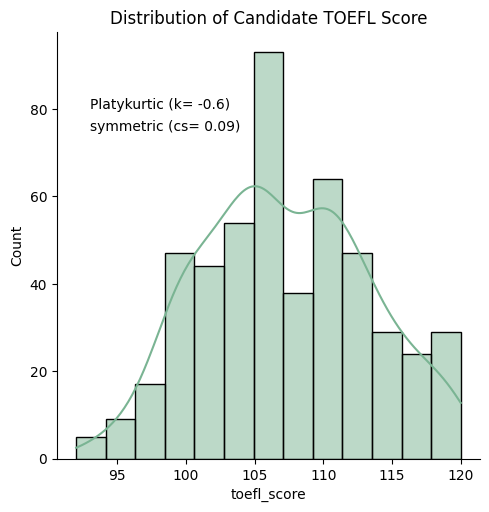

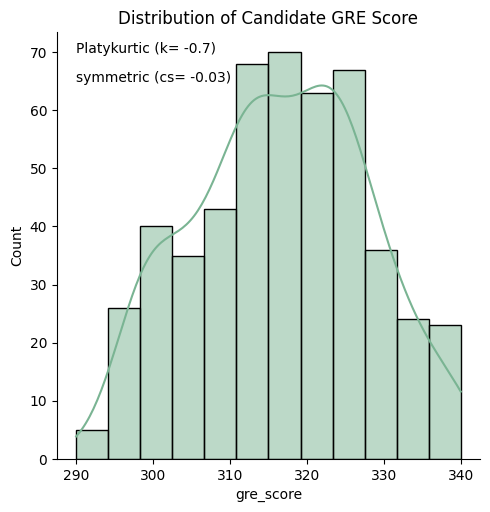

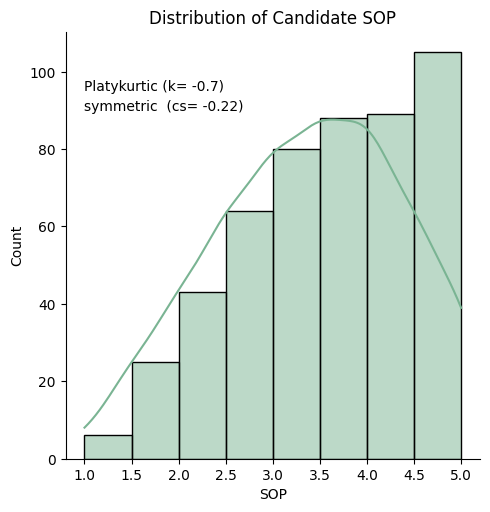

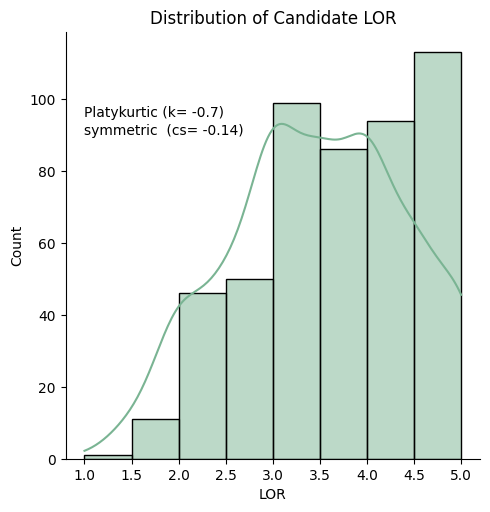

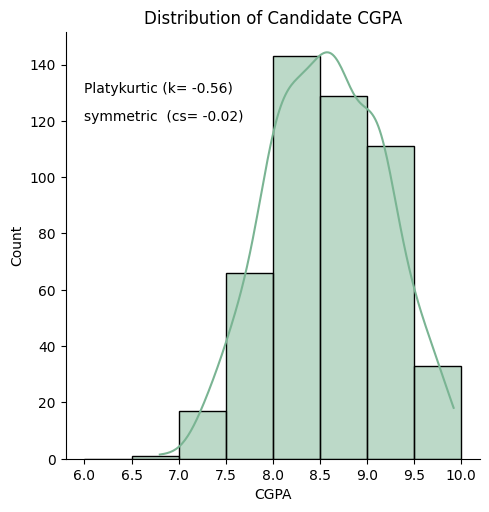

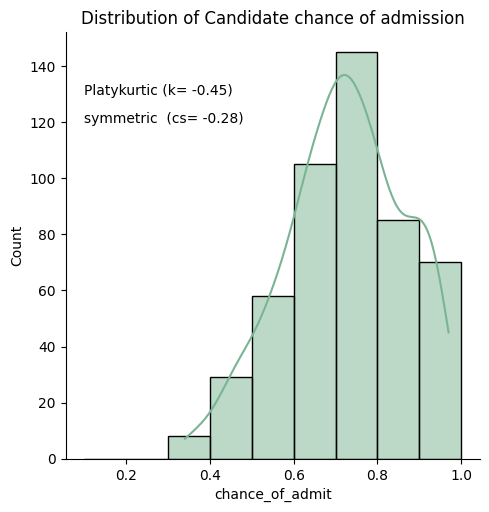

In [ ]:
#checking distribution all features
plt.figure(figsize=(6,6))

sns.displot(data=df_num, x='toefl_score',kde=True,color=green)  # Use sns.histplot for axes-level histogram
plt.title('Distribution of Candidate TOEFL Score')  # Set title for the subplot
plt.text(s='Platykurtic (k= -0.6)',x=93,y=80)
plt.text(s='symmetric (cs= 0.09)',x=93,y=75)
plt.show()



#plt.subplot(3, 2, 2)
sns.displot(data=df_num, x='gre_score',color=green,kde=True)  # Use sns.histplot for axes-level histogram
plt.title('Distribution of Candidate GRE Score')  # Set title for the subplot
plt.text(s='Platykurtic (k= -0.7)',x=290,y=70)
plt.text(s='symmetric (cs= -0.03)',x=290,y=65)
plt.show()

#plt.subplot(3, 2, 3)
sns.displot(data=df_num, x='SOP',bins=[1,1.5,2,2.5,3,3.5,4,4.5,5],color=green,kde=True)
plt.title('Distribution of Candidate SOP')
plt.text(s='Platykurtic (k= -0.7)',x=1,y=95)
plt.text(s='symmetric  (cs= -0.22)',x=1,y=90)
plt.show()


#plt.subplot(3, 2, 4)
sns.displot(data=df_num, x='LOR',bins=[1,1.5,2,2.5,3,3.5,4,4.5,5],color=green,kde=True)
plt.title('Distribution of Candidate LOR')
plt.text(s='Platykurtic (k= -0.7)',x=1,y=95)
plt.text(s='symmetric  (cs= -0.14)',x=1,y=90)
plt.show()

#plt.subplot(3, 2, 5)
sns.displot(data=df_num, x='CGPA',bins=[6,6.5,7,7.5,8,8.5,9,9.5,10],color=green,kde=True)
plt.title('Distribution of Candidate CGPA')
plt.text(s='Platykurtic (k= -0.56)',x=6,y=130)
plt.text(s='symmetric  (cs= -0.02)',x=6,y=120)
plt.show()

#plt.subplot(3, 2, 6)
sns.displot(data=df_num, x='chance_of_admit',bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],color=green,kde=True)
plt.title('Distribution of Candidate chance of admission')
plt.text(s='Platykurtic (k= -0.45)',x=0.1,y=130)
plt.text(s='symmetric  (cs= -0.28)',x=0.1,y=120)

#plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**Univariate Analysis:** Distribution of Features (Categorical data)

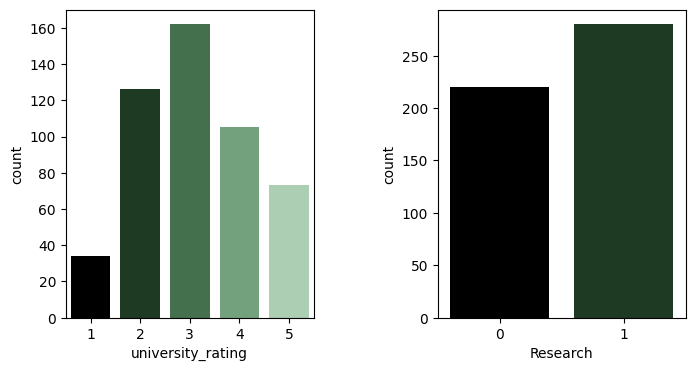

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(data=df_cat,x='university_rating',palette=my_palette)


plt.subplot(1,2,2)
sns.countplot(data=df_cat,x='Research',palette=my_palette)


plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

**Univariate Analysis Observations:**
1. Features exhibit diverse distributions across the dataset.
2. Students typically have GRE scores above 290; there is no applicants with scores below this threshold.
3. Students with TOEFL score 85 to 120 applies.
4. Students have diverse range of SOR and LOR.
5. Studnts who applies have minimum CGPA 6.5.
6. Students from all the types of university rating applies.
7. Number of Students applying from Research and Non-Research background are comparable.
8. Overall, Students of varied merit apply.

9. All the features are flatter compared to normal distribution which implies wider distribution.
10. All the features are symmetrically distributed which implies that both good and bad students are applying when compared to mean.

**Bivariate Analysis:** Let's try to check how dependent varaiables (chance_of_admit) are related to Independant variables.

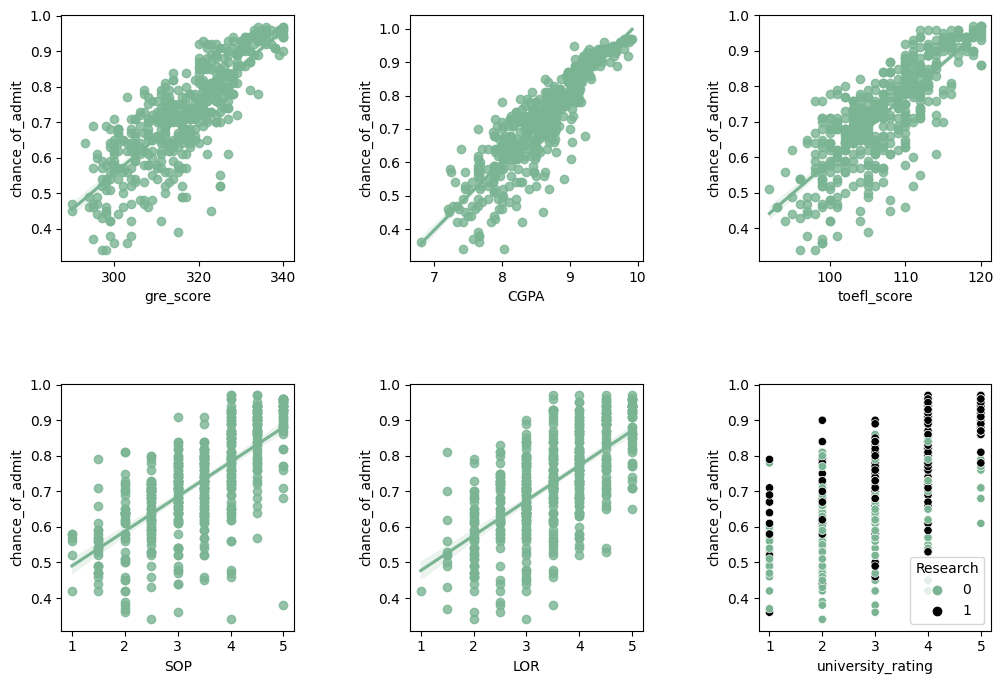

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.regplot(data=df,x='gre_score',y='chance_of_admit',color=green)

plt.subplot(2,3,2)
sns.regplot(data=df,y='chance_of_admit',x='CGPA',color=green)

plt.subplot(2,3,3)
sns.regplot(data=df,y='chance_of_admit',x='toefl_score',color=green)

plt.subplot(2,3,4)
sns.regplot(data=df,y='chance_of_admit',x='SOP',color=green)

plt.subplot(2,3,5)
sns.regplot(data=df,y='chance_of_admit',x='LOR',color=green)

plt.subplot(2,3,6)
sns.scatterplot(data=df,y='chance_of_admit',x='university_rating',palette=[green,'k'],hue='Research')


plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

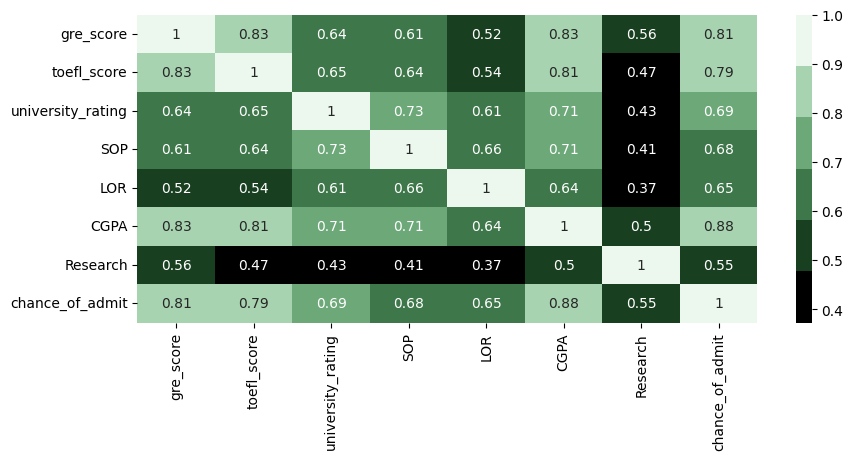

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap=my_palette)
plt.show()

Bivariate Analysis observations:
---
1. GRE score, TOEFL score and CGPA are strongly linearly coorelated to chances of admission. there is high chance that they may lead to some multicollinearity.
2. University rating, SOP, LOR & Research is moderately correalated to chances of admission.


3. Students having higher CGPA tends to have a higher gre score & toefl score. As brighter students perform fairly well across examinations.
4. Most of the independent features do not have strong correlation among themselves except GRE score, TOEFL scores and CGPA.
5. Target variable shows good linear coorelation  with all the predictor variable, Hence we should start building a Linear Regression Model.






# 3. Outliers in Features

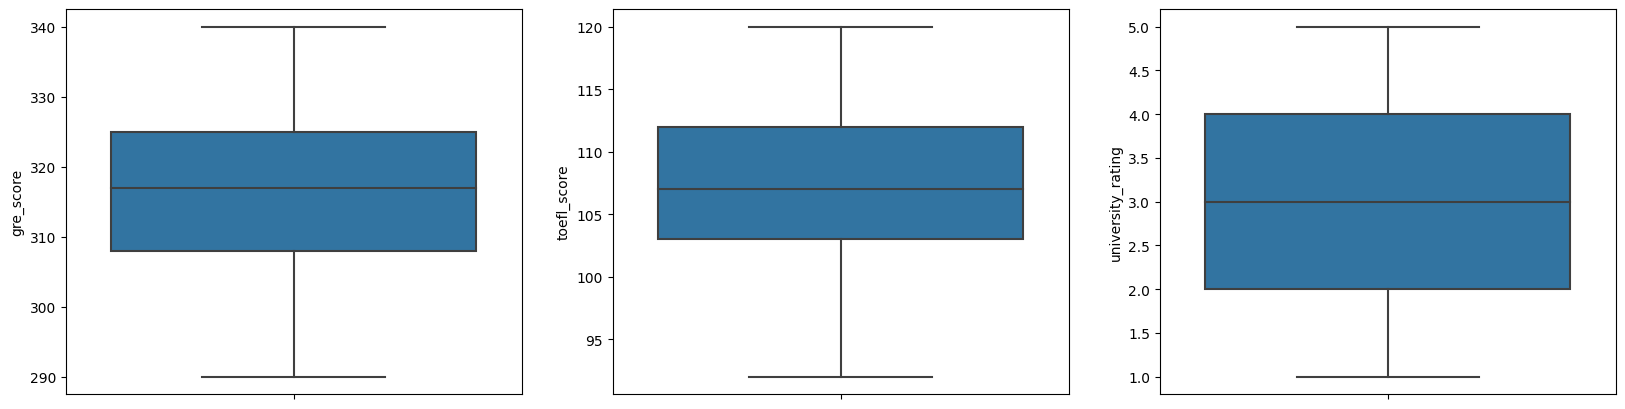

In [ ]:
plt.figure(figsize=(20,5))
j=1
for i in df.columns[:3]:
  plt.subplot(1,3,j)
  sns.boxplot(data=df,y=i)
  j+=1
plt.show()

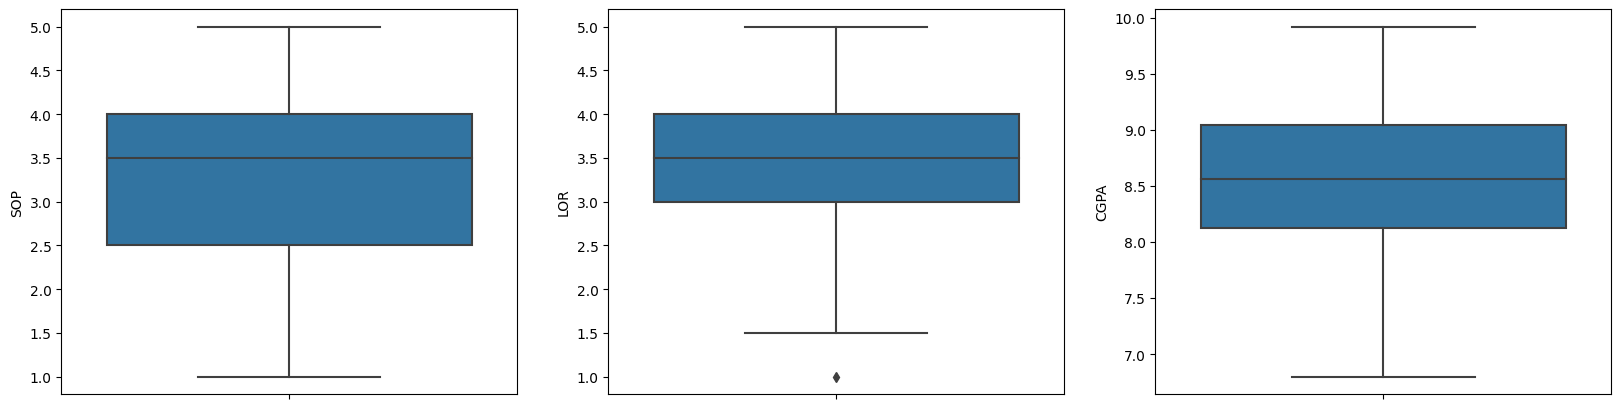

In [ ]:
plt.figure(figsize=(20,5))
j=1
for i in df.columns[3:6]:
  plt.subplot(1,3,j)
  sns.boxplot(data=df,y=i)
  j+=1
plt.show()

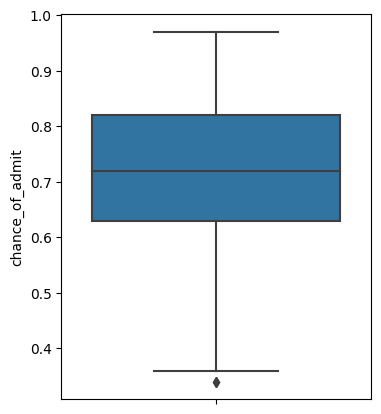

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,y='chance_of_admit')

plt.show()

Observations:
1. Most of features do not have outliers.
2. There is small number of outliers in target variable and LOR feature.

# 4. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler  #as all the features are +ve only so we will prefer Normalization for feture scaling
scale=MinMaxScaler()

In [ ]:
df1=df.copy()
y=df['chance_of_admit'].copy()        #creating a seperate copy of targer variable

In [ ]:
#feature scaling using Normalization
df=pd.DataFrame(scale.fit_transform(df[['gre_score', 'toefl_score', 'university_rating', 'SOP', 'LOR', 'CGPA','Research']]),
                              columns=['gre_score', 'toefl_score', 'university_rating', 'SOP', 'LOR', 'CGPA',
                                        'Research'])

In [ ]:
df.head()

,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [ ]:
df['gre_score'].unique()

array([0.94, 0.68, 0.52, 0.64, 0.48, 0.8 , 0.62, 0.36, 0.24, 0.66, 0.7 ,
       0.74, 0.76, 0.34, 0.42, 0.54, 0.58, 0.56, 0.26, 0.44, 0.88, 0.92,
       1.  , 0.16, 0.1 , 0.4 , 0.2 , 0.96, 0.82, 0.6 , 0.18, 0.28, 0.46,
       0.84, 0.72, 0.78, 0.98, 0.38, 0.5 , 0.22, 0.12, 0.08, 0.32, 0.3 ,
       0.  , 0.9 , 0.86, 0.14, 0.06])

# 5. Splitting the dataset into Training and Test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=2)

In [ ]:
x_train.head()

,gre_score,toefl_score,university_rating,SOP,LOR,CGPA,Research
428,0.52,0.392857,0.25,0.250,0.875,0.621795,0.0
490,0.34,0.464286,0.25,0.375,0.875,0.423077,1.0
53,0.68,0.714286,0.75,0.750,0.375,0.416667,1.0
336,0.58,0.642857,0.50,0.500,0.375,0.637821,0.0
154,0.72,0.571429,0.50,0.500,0.625,0.669872,0.0


In [ ]:
y_train.head()

428    0.69
490    0.67
53     0.72
336    0.72
154    0.80
Name: chance_of_admit, dtype: float64

# 6. Modelling :

# 6.1 Iteration 1: Linear Regression with loss function as OLS



*Note:*
1. We will use statsmodel to understand statistical aspect of linear regression.

In [ ]:
import statsmodels.api as sm  #importing stats model library

In [ ]:
x_m=sm.add_constant(x_train)        #adding constant as stats model do not have intercept in default

In [ ]:
model=sm.OLS(y_train,x_m)

In [ ]:
results=model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.33e-146
Time:                        18:43:41   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3450      0.01

Initial Remarks:
1. R2 score is 0.82 which is fairly good.
2. P-value of university rating & SOP is greater than significance level (0.05). which implies that university rating and SOP are insignificant features in presence of other features.
*Note:* But i am not removing these features as data have only 7 features and the value of weight will take care of this.
3. standard error of estimating weights are fairly low for all the features. hence values of weights can be trusted.

***Feature Importance***
4. CGPA is the most importance features deciding the admissions.
5. GRE score is second most importance feature followed by TOEFL score, LOR, Research, university rating, SOP



In [ ]:
y_hat_train=results.predict(x_m)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('MSE for training data=', mean_squared_error(y_train,y_hat_train))   #MSE for training dataset

MSE for training data= 0.0033294416377242725


Remark:
1. MSE value is quite low. model seems good fit but we need to check for overfitting.
2. We may try regularization i.e. lasso & ridge to avoid overfitting.
3. but Before building any other model, lets check for multicolinearity in initial phase itself.

# 6.2 Check for Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_tt=x_train[['gre_score', 'toefl_score', 'university_rating', 'LOR', 'CGPA',
       'Research']]

In [ ]:
vif=pd.DataFrame()

In [ ]:
vif['features']=x_tt.columns

In [ ]:
vif['vif']=[variance_inflation_factor(x_tt,i) for i in range(x_tt.shape[1])]

In [ ]:
vif.sort_values('vif',ascending=False)

,features,vif
4,CGPA,40.674716
1,toefl_score,29.008473
0,gre_score,28.874589
3,LOR,13.144431
2,university_rating,9.500383
5,Research,3.276553


In [ ]:
vif['vif'].values[0]

28.874589128653046

Remarks:
1. it seems that there is presence of multicolinearity.
2. let's try to deal with it
2. we will remove feature when vif if high and r2 score of model remains entact to 8.5.



In [ ]:
r2_threshold=8  #setting threshold
vif_threshold=5


row_todelete=[]
i=1
cols=x_train.columns
ans=True
while ans==True:
  vif=pd.DataFrame()
  x_t=pd.DataFrame(x_train,columns=x_train.columns)[cols]

  vif['features']=cols
  vif['vif']=[variance_inflation_factor(x_t.values, j) for j in range(x_t.shape[1])]
  vif=vif.sort_values('vif',ascending=False)

  feature_not_in_model=vif['features'].values[0]

  cols=vif['features'][1:]
  x_m=x_t[cols]
  x_m=sm.add_constant(x_m)
  results=sm.OLS(y_train,x_m).fit()



  if (vif['vif'].values[0]>vif_threshold) and (results.rsquared_adj>r2_threshold):
    row_todelete.append(feature_not_in_model)
    ans=True
  else:
    ans=False




In [ ]:
row_todelete

[]

Remarks:
1. we are not able to delete any feature while maintaining r2 as 0.8
2. We can note that we have used Normalization to scale features and normalization also enhances multicolinearity by shrinking the data into a specific range.
3. So let's try to scale features using Standardization and again check multicolinearity.

# 6.3 Iteration 2: Feature Scaling using Standardization, Modelling & Multicollinearity

**Repeating previous steps from scaling onwards**

In [ ]:
from sklearn.preprocessing import StandardScaler  #changing scaling technique to standardization
scale=StandardScaler()

In [ ]:
df=pd.DataFrame(scale.fit_transform(df1[['gre_score', 'toefl_score', 'university_rating', 'SOP', 'LOR', 'CGPA',
                                        'Research']]),columns=['gre_score', 'toefl_score', 'university_rating', 'SOP', 'LOR', 'CGPA',
                                        'Research'])

**splitting dataset**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=2)

**modelling using statsmodel library**

In [ ]:
x_m=sm.add_constant(x_train)
model=sm.OLS(y_train,x_m)
results=model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.33e-146
Time:                        18:43:41   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7230      0.00

Remarks:
1. P-value of university rating & SOP are greater than 0.05.
2. 2 features seems insignificant. lets try to delete SOP and again check P-values

**dropping insignificant feature (SOP)**

In [ ]:
x_train.drop(columns=['SOP'],inplace=True)
x_test.drop(columns=['SOP'],inplace=True)

In [ ]:
x_m=sm.add_constant(x_train)  #add constant
model=sm.OLS(y_train,x_m)
results=model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     318.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.96e-147
Time:                        18:43:41   Log-Likelihood:                 573.32
No. Observations:                 400   AIC:                            -1133.
Df Residuals:                     393   BIC:                            -1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7230      0.00

In [ ]:
y_hat_train=results.predict(x_m)

In [ ]:
x_t=sm.add_constant(x_test)   #adding const as statsmodel do not have default
y_hat_test=results.predict(x_t)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE_linear_regression=mean_absolute_error(y_train,y_hat_train)
MSE_linear_regression=mean_squared_error(y_train,y_hat_train)
MSE_test_linear_regression=mean_squared_error(y_test,y_hat_test)

r2_score_train_linear_regression=results.rsquared
r2_score_test_linear_regression=r2_score(y_test,y_hat_test)

print(f'MAE using Linear Regression is {MAE_linear_regression}')
print(f'THe MSE using Linear Regression on training data is {MSE_linear_regression} while on test dataset is {MSE_test_linear_regression}')
print(f'the r2 score using linear regression on train data is {r2_score_train_linear_regression} while no test dataset is {r2_score_test_linear_regression}')


MAE using Linear Regression is 0.041377898757214066
THe MSE using Linear Regression on training data is 0.003330994212215537 while on test dataset is 0.004427004579870589
the r2 score using linear regression on train data is 0.8292431336917518 while no test dataset is 0.7928592146031253


In [ ]:
r2_score(y_train,y_hat_train)  #checking goodness of fit of model

0.8292431336917518

Remarks:
1. All P-values are below 0.05 except university rating.
2. It seems that university rating seems insignificant feature in presence of other feature.
3. But let's keep it. and work with it as university rating seems practically a legit feature.
4. It must be noted that weight for university rating is low so keeping it won't be much problem.

**Checking Multicollinearity**



In [ ]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]

In [ ]:
vif

,features,vif
0,gre_score,4.236290
1,toefl_score,3.987615
2,university_rating,2.267688
3,LOR,1.809199
4,CGPA,4.656769
5,Research,1.466453


Remarks:
1. Multicollinearity has been reduced by changing scaling technique and is under control (vif<5)

# 6.4 Lets try Linear Regression using Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
y_hat_ridge=ridge_model.predict(x_train)
y_hat_test_ridge=ridge_model.predict(x_test)

In [ ]:
MAE_ridge=mean_absolute_error(y_train,y_hat_ridge)
MSE_ridge=mean_squared_error(y_train,y_hat_ridge)
MSE_ridge_test=mean_squared_error(y_test,y_hat_test_ridge)

r2_score_ridge=r2_score(y_train,y_hat_ridge)
r2_score_ridge_test=r2_score(y_test,y_hat_test_ridge)



print(f'THe MAE using ridge regression is {MAE_ridge}')
print(f'The MSE using Ridge regularization is {MSE_ridge} while on test data is {MSE_ridge_test}')
print(f'THe r2 score for ridge is {r2_score_ridge} while for test data is {r2_score_ridge_test}')

THe MAE using ridge regression is 0.04137820036315017
The MSE using Ridge regularization is 0.0033309950191464186 while on test data is 0.004427217002442998
THe r2 score for ridge is 0.8292430923260274 while for test data is 0.7928492752914099


# 6.5 Lets try Linear Regression using Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_hat_lasso=lasso_model.predict(x_train)
y_hat_test_lasso=lasso_model.predict(x_test)

In [ ]:
MAE_lasso=mean_absolute_error(y_train,y_hat_lasso)
MSE_lasso=mean_squared_error(y_train,y_hat_lasso)
MSE_lasso_test=mean_squared_error(y_test,y_hat_test_lasso)

r2_score_lasso=r2_score(y_train,y_hat_lasso)
r2_score_test_lasso=r2_score(y_test,y_hat_test_lasso)




print(f'MSE using Lasso regularization is {MSE_lasso} while for test data is {MSE_lasso_test}')
print(f'MAE using lasso regularization is {MAE_lasso}')
print(f'r2 score for lasso regularization is {r2_score_lasso} while for test data is {r2_score_test_lasso}')

MSE using Lasso regularization is 0.01451282783763485 while for test data is 0.015889044883881855
MAE using lasso regularization is 0.09672821715695434
r2 score for lasso regularization is 0.2560284272672635 while for test data is 0.2565471354109844


#7. Finalizing the Model

In [ ]:
#simple Linear regression summary for training dataset

print(f'MAE using Linear Regression is {MAE_linear_regression}')
print(f'THe MSE using Linear Regression on training data is {MSE_linear_regression} while on test dataset is {MSE_test_linear_regression}')
print(f'the r2 score using linear regression on train data is {r2_score_train_linear_regression} while no test dataset is {r2_score_test_linear_regression}')
print()

#Ridge
print(f'THe MAE using ridge regression is {MAE_ridge}')
print(f'The MSE using Ridge regularization is {MSE_ridge} while on test data is {MSE_ridge_test}')
print(f'THe r2 score for ridge is {r2_score_ridge} while for test data is {r2_score_ridge_test}')
print()

#Lasso
print(f'MAE using lasso regularization is {MAE_lasso}')
print(f'MSE using Lasso regularization is {MSE_lasso} while for test data is {MSE_lasso_test}')
print(f'r2 score for lasso regularization is {r2_score_lasso} while for test data is {r2_score_test_lasso}')

MAE using Linear Regression is 0.041377898757214066
THe MSE using Linear Regression on training data is 0.003330994212215537 while on test dataset is 0.004427004579870589
the r2 score using linear regression on train data is 0.8292431336917518 while no test dataset is 0.7928592146031253

THe MAE using ridge regression is 0.04137820036315017
The MSE using Ridge regularization is 0.0033309950191464186 while on test data is 0.004427217002442998
THe r2 score for ridge is 0.8292430923260274 while for test data is 0.7928492752914099

MAE using lasso regularization is 0.09672821715695434
MSE using Lasso regularization is 0.01451282783763485 while for test data is 0.015889044883881855
r2 score for lasso regularization is 0.2560284272672635 while for test data is 0.2565471354109844


Remarks:
1. Lasso regularization is worst model
2. Among simple and ridge model, simple model have slightly higher r2 score than ridged one.
3. Hence Most appropriate model is simple Linear Regression without any regulaization


# 8. Checking Assumptions of Linear Regression

**8.1 Normality of Residuals**

In [ ]:
errors= y_hat_test - y_test  #calculating residuals

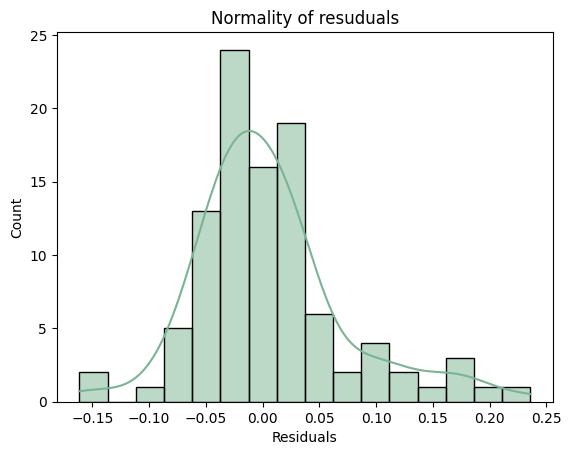

In [ ]:
sns.histplot(errors,color=green, kde=True)
plt.xlabel('Residuals')
plt.title('Normality of resuduals')

plt.show()

1. Mean is close to zero and standard deviation close to 0.1
2. let's check using Shapiro wilk test to find out if its normal distribution or not.

In [ ]:
# H0: data is normally distributed.
# Ha: data is not normally distributed

from scipy import stats
res=stats.shapiro(errors)
res.statistic

0.9206103682518005

1. P-value is greater than 0.05.
2. This implies, we can not reject null hypothesis
3. Hence Errors are Normally distributed.
4. Hence model have passed this sanity assumption check.

**8.2 Heteroskedasticity**

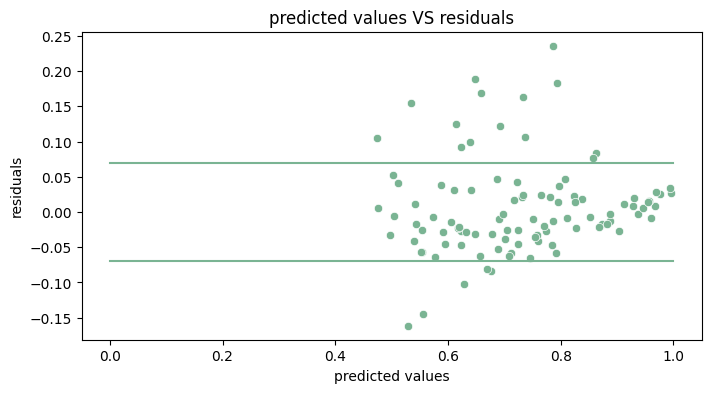

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(y=errors, x=y_hat_test,color=green)
plt.title('predicted values VS residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')


x_graph=[0,1]
y_graph=[0.07,0.07]
sns.lineplot(x=x_graph, y=y_graph,color=green)

y1_graph=[-0.07,-0.07]
sns.lineplot(x=x_graph, y=y1_graph,color=green)

plt.show()

Remarks:
1. Majority of data points looks shows constant varition but there are some outliers as well.
2. To check their impact, we can test using Goldfeld Quandt test.



In [ ]:
import statsmodels.stats.api as sms

In [ ]:
#H0: Heteroscedasticity is not present in data
# Ha: Heteroscedasticity is present in data.

ans=sms.het_goldfeldquandt(y_train,x_train)
print(f'the F statistic is {ans[0]}')
print(f'the P-value of test is {ans[1]}')

the F statistic is 1.0083523463658415
the P-value of test is 0.47693361427638753


remarks:
1. P-value is greater than significance level(0.05). Hence we failed to reject null hypothesis.
2. Which implies that there is no Heteroskedasticity in the data.


**Visulaizing the actual and predicted values**

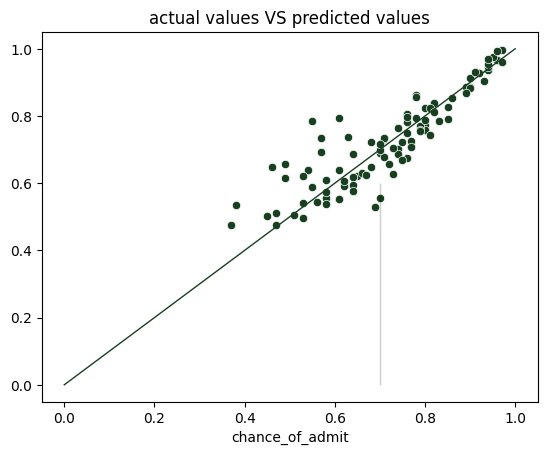

In [ ]:
sns.scatterplot(x=y_test,y=y_hat_test,color=dark_green)

x_data=[0,1]
y_data=[0,1]
sns.lineplot(x=x_data,y=y_data,color=dark_green,linewidth=1)

plt.title('actual values VS predicted values')

x2=[0.7,0.7]
y2=[0,0.6]
sns.lineplot(x=x2,y=y2,color='k',linewidth=5)
plt.show()

Observations:
1. The model is giving good results when chances of admit is high.
2. But model is not performing when chances of admit is low typically below 0.7

# Summary of the Model

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     318.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.96e-147
Time:                        18:43:43   Log-Likelihood:                 573.32
No. Observations:                 400   AIC:                            -1133.
Df Residuals:                     393   BIC:                            -1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7230      0.00

1. Test MSE of model is 0.004427004579870589
2. Test r2 score of Model is 0.7928592146031253


# Insights:



1. Model performs well when chances of admission is higher (>0.7).
2. Model performs slightly poor when chances of admission is lower than 0.7
3. CGPA is most important feature. A higher CGPA increases chances of admission the most.
4. It must be noted that GRE and TOEFL are similar exams. but GRE score have slightly have more than TOEFL
4. order of importance of features is CGPA> GRE Score > TOEFL Score > LOR > Research > university rating.
5. SOP becomes insignificant feature in light of all other features. which means all other features together reduces impact of presence of SOP.
6. University rating is also one of least important feature among all other available features .

# Recommendations:

1. The Company can confidently consider students from low rating universities and may yield good results from them.
2. Company may priortise GRE more than TOEFL as GRE have compartively better impact.
3. To increase Efficiency,The Company can focus on students with higher CGPA. May be seperate batch of such students may give better results.
4. Company may collect more data for students with chances of admission less than 0.7 as the built model is giving moderate results for such students and a better model can be built for such students.